In [173]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [174]:
labels = ['Start', 'Step 0', 'Step 1', 'Step 2', 'Step 3', 'Step 4', 'End']
start_value = 20
dvalues = [5, 10, -5, 10, -5]
end_value = start_value + sum(dvalues)

# list for the end values
ends = [0]*(len(dvalues)+2)
ends[0] = start_value
ends[-1] = end_value

values = []
values.append(0)
current_value = start_value
for i in dvalues: 
    values.append( current_value)
    current_value = i + current_value
values.append(0)


dvalues.insert(0,0)
dvalues.append(0)
print(labels)
print(ends)
print (values)
print(dvalues)


['Start', 'Step 0', 'Step 1', 'Step 2', 'Step 3', 'Step 4', 'End']
[20, 0, 0, 0, 0, 0, 35]
[0, 20, 25, 35, 30, 40, 0]
[0, 5, 10, -5, 10, -5, 0]


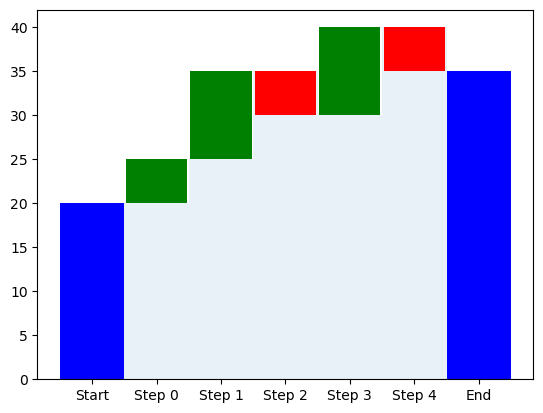

In [226]:
fig, ax = plt.subplots()

colors = ['g' if e >= 0 else 'r' for e in dvalues]

p = ax.bar(labels, values, width = 1, alpha=0.1)
ax.bar(labels, dvalues, bottom = values, color = colors, width = 0.95)
ax.bar(labels, ends, color = 'b', width = 1)
max(values)
ax.set_ylim(min(values),max(values)*1.05)
plt.plot([0,0], [20,20], color='k', linestyle='-', linewidth=2)

In [118]:
#dvalues = [abs(i) for i in dvalues]
data = pd.DataFrame([labels, ends, values, dvalues]).T#, columns = ['labels','values','dvalues'])
data

,0,1,2,3
0,Start,100,0,0
1,Step 0,0,110,10
2,Step 1,0,120,10
3,Step 2,0,140,20
4,Step 3,0,130,-10
5,Step 4,0,120,-10
6,End,120,0,0


<AxesSubplot:xlabel='0'>

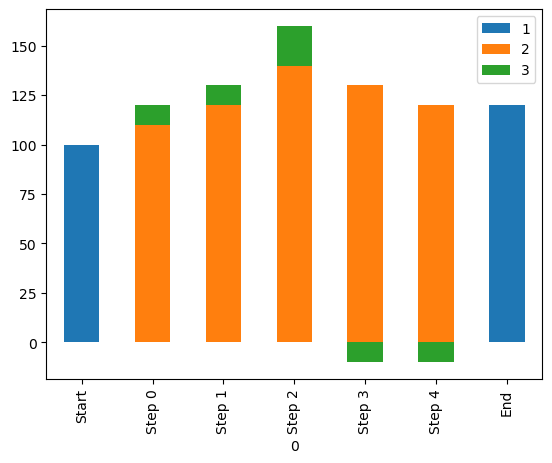

In [119]:
data.plot.bar(x=0, y = [1,2,3],stacked = True)

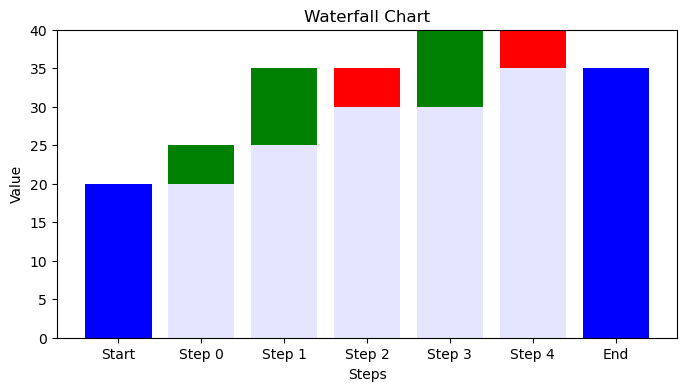

In [176]:
plt.figure(figsize=(8, 4))
plt.bar(labels, values, color='b', alpha=0.1, align='center')
plt.bar(labels, dvalues, color=colors, align='center',  bottom = values)
plt.bar(labels, ends, color = 'b')
plt.title('Waterfall Chart')
plt.xlabel('Steps')
plt.ylabel('Value')
plt.show()


In [227]:
import plotly.graph_objects as go

fig = go.Figure(go.Waterfall(
    name = "20", orientation = "v",
    measure = ["relative", "relative", "total", "relative", "relative", "total"],
    x = ["Sales", "Consulting", "Net revenue", "Purchases", "Other expenses", "Profit before tax"],
    textposition = "outside",
    text = ["+60", "+80", "", "-40", "-20", "Total"],
    y = [60, 80, 0, -40, -20, 0],
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

fig.update_layout(
        title = "Profit and loss statement 2018",
        showlegend = True
)

fig.show()

In [254]:
import plotly.graph_objects as go

def waterfall(labels,data, annotation=None, title=""):
    fig = go.Figure(go.Waterfall(
        name = "20", orientation = "v",
        measure = ["relative","relative", "relative", "relative", "relative", "total"],
        textposition = "outside",
        text = annotation,
        y = data,
        x = labels,
        connector = {"line":{"color":"rgb(63, 63, 63)"}},
    ))

    fig.update_layout(
            title = title,
            showlegend = True
    )
    return fig

labels = ["Start balance", "Consulting", "Net revenue", "Purchases", "Other expenses", "Profit before tax"]
data = [20, 80, 10, -40, -20, 0]
data_annotation = ["", "+80", "", "-40", "-20", "Total"]
title = "Sales revenue"
waterfall(labels,data, data_annotation, title).show()